# Receptor Density - Gene Expression Data


General API guide: http://help.brain-map.org/display/mousebrain/API

General RMA Guide http://help.brain-map.org/pages/viewpage.action?pageId=5308449

Class Hierarchy http://api.brain-map.org/class_hierarchy

Examples RMA URL Queries http://help.brain-map.org/display/api/Example+Queries+for+Experiment+Metadata

Python API Queries https://alleninstitute.github.io/AllenSDK/data_api_client.html

RMA Query Building Web Application http://api.brain-map.org/examples/rma_builder/index.html

### Informatics Data Processing
The informatics data processing pipeline produces results that enable the navigation, analysis and visualization. The pipeline consists of the following components:
- an annotated 3-D reference space,
- an alignment module,
- an expression detection module,
- an expression gridding module, and
- a structure unionizer module.

The output of the pipeline is quantified expression values at a grid voxel level and at a structure level according to the integrated reference atlas ontology. The grid level data are used downstream to provide a differential and correlative gene search service and to support visualization of spatial relationships.

In [44]:
from allensdk.api.queries.rma_api import RmaApi
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

rma = RmaApi()

Get experiments for a particular gene - DRD1

In [10]:
# http://api.brain-map.org/api/v2/data/query.xml?criteria=
# model::SectionDataSet
# ,
# rma::criteria,
# products[abbreviation$eqMouse],genes[acronym$eqDrd1]
# ,
# rma::include,
# structure_unionizes

gene = "Drd1"
        
data = rma.model_query('SectionDataSet', criteria="products[abbreviation$eq'Mouse'],genes[acronym$eq'"+gene+"']",
                      include="structure_unionizes")

In [11]:
data_df = pd.DataFrame(data)
data_df

,blue_channel,delegate,expression,failed,failed_facet,green_channel,id,name,plane_of_section_id,qc_date,red_channel,reference_space_id,rnaseq_design_id,section_thickness,specimen_id,sphinx_id,storage_directory,weight,structure_unionizes
0,None,True,True,False,734881840,None,71307280,None,2,2009-05-02T22:56:37Z,None,10,None,25.0,70429761,150678,/external/aibssan/production32/prod334/image_s...,5470,"[{'expression_density': 0.0159272, 'expression..."
1,None,False,False,False,734881840,None,352,None,1,None,None,9,None,25.0,702565,78451,/external/mouse/prod1/image_series_352/,5470,"[{'expression_density': 0.0136562, 'expression..."
2,None,False,False,False,734881840,None,353,None,2,None,None,10,None,25.0,702529,76510,/external/mouse/prod1/image_series_353/,5470,"[{'expression_density': 0.00817143, 'expressio..."
3,None,False,False,False,734881840,None,354,None,2,None,None,10,None,25.0,702473,95220,/external/mouse/prod0/image_series_354/,5270,"[{'expression_density': 7.11597e-05, 'expressi..."


In [12]:
experiment_id = 353
param = 'expression_density'

In [13]:
exp_union_data = pd.DataFrame(data_df[data_df['id']==experiment_id]['structure_unionizes'].item())
exp_union_data

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
0,0.008171,1.097120,398484594,353,15564,1.247590e+09,9292150.000,2.520100e+10,1.137150e+09,2.657610,1.096010
1,0.008171,1.097120,398484597,353,15565,1.247590e+09,9292150.000,2.520100e+10,1.137150e+09,2.657610,1.096010
2,0.010952,1.481770,398484604,353,15566,1.148940e+09,8491790.000,1.678110e+10,7.753830e+08,2.328170,1.481180
3,0.012336,1.672050,398484612,353,15567,1.135570e+09,8378020.000,1.474800e+10,6.791490e+08,2.180090,1.671290
4,0.000695,0.087989,398484614,353,15568,2.630740e+06,20770.700,4.662790e+08,2.989850e+07,2.344180,0.087989
...,...,...,...,...,...,...,...,...,...,...,...
2404,0.000198,0.024448,398520317,353,182305697,4.274550e+04,345.941,3.581480e+07,1.748450e+06,1.518590,0.024448
2405,0.000662,0.083920,398520335,353,182305701,4.108420e+04,323.881,1.085670e+07,4.895660e+05,1.072950,0.083920
2406,0.013126,1.778890,398520348,353,182305705,3.172510e+06,23409.100,4.605390e+07,1.783420e+06,1.291390,1.778890
2407,0.056744,7.730210,398520360,353,182305709,8.920480e+06,65481.100,3.937200e+07,1.153980e+06,0.826628,7.730210


In [14]:
newdf = exp_union_data[exp_union_data[param] > 0.01]

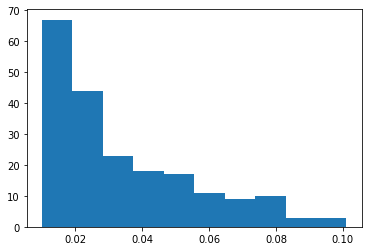

In [15]:
plt.hist(newdf[param])
plt.show()

In [16]:
len(newdf['structure_id'].unique())

205

In [17]:
print(len(newdf['structure_id']))
print(len(newdf['structure_id'].unique()))
print(newdf[newdf['structure_id']==15850][param])

205
205
211    0.07296
Name: expression_density, dtype: float64


In [18]:
# printing structure name, id and expression density for all unionized data points

# for s_id in newdf['structure_id'].unique():
#     structure = rma.model_query('StructureLookup', criteria="structure[id$eq"+str(s_id)+"]",include="structure")[0]
#     print(structure['structure']['name'],'--',structure['structure']['acronym'],'--','id',s_id,'--',param,'=',newdf[newdf['structure_id']==s_id][param].item())

### Only getting the visual areas from unionized data

In [19]:
# The ID that has to be within structure_id_path of structures in unionized data
PARENT_AREA_ID = 669 # all visual areas

In [20]:
newdf.head()

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
2,0.010952,1.48177,398484604,353,15566,1.148940e+09,8491790.00,1.678110e+10,775383000.0,2.32817,1.48118
3,0.012336,1.67205,398484612,353,15567,1.135570e+09,8378020.00,1.474800e+10,679149000.0,2.18009,1.67129
129,0.012872,1.74500,398485707,353,15738,1.132940e+09,8357250.00,1.428170e+10,649250000.0,2.12707,1.74417
130,0.013192,1.78865,398485714,353,15739,1.132200e+09,8350710.00,1.398700e+10,632990000.0,2.09599,1.78778
131,0.012700,1.60243,398485727,353,15740,1.681060e+05,1332.34,2.452430e+06,104907.0,1.52667,1.60243


In [21]:
def query_id_path(s_id):
    query = rma.model_query('StructureLookup', criteria="structure[id$eq"+str(s_id)+"]",include="structure",
        options="[only$eq'structure_lookups.termtype,structure_lookups.structure_id_path']")[0]
    return query['structure']['structure_id_path']

In [22]:
print(query_id_path(15566))

/15564/15565/15566/


In [41]:
# dict(newdf[newdf['structure_id']==15566])
# newdf[newdf['structure_id']==15566].to_dict('records')
pd.DataFrame(newdf[newdf['structure_id']==15566].to_dict('records'))

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
0,0.010952,1.48177,398484604,353,15566,1.148940e+09,8491790.0,1.678110e+10,775383000.0,2.32817,1.48118


In [45]:
out_df = []
for s_id in tqdm(newdf['structure_id'],'Searching for data from visual areas'):
    hasParentInPath = str(PARENT_AREA_ID) in query_id_path(s_id)
    if hasParentInPath:
        out_df.append(newdf[newdf['structure_id']==s_id].to_dict('records')[0])
#         print(newdf[newdf['structure_id']==s_id])
out_df = pd.DataFrame(out_df)



Searching for data from visual areas:   0%|                                                    | 0/205 [00:00<?, ?it/s]

Searching for data from visual areas:   0%|▏                                           | 1/205 [00:00<01:30,  2.25it/s]

Searching for data from visual areas:   1%|▍                                           | 2/205 [00:00<01:22,  2.45it/s]

Searching for data from visual areas:   1%|▋                                           | 3/205 [00:01<01:21,  2.49it/s]

Searching for data from visual areas:   2%|▊                                           | 4/205 [00:01<01:19,  2.54it/s]

Searching for data from visual areas:   2%|█                                           | 5/205 [00:01<01:18,  2.54it/s]

Searching for data from visual areas:   3%|█▎                                          | 6/205 [00:02<01:17,  2.57it/s]

Searching for data from visual areas:   3%|█▌                                          | 7/205 [00:02<01:17,  2.57it/s]

Searching for data from visual

Searching for data from visual areas:  31%|█████████████▍                             | 64/205 [00:25<00:58,  2.43it/s]

Searching for data from visual areas:  32%|█████████████▋                             | 65/205 [00:25<00:56,  2.46it/s]

Searching for data from visual areas:  32%|█████████████▊                             | 66/205 [00:26<00:55,  2.52it/s]

Searching for data from visual areas:  33%|██████████████                             | 67/205 [00:26<00:54,  2.55it/s]

Searching for data from visual areas:  33%|██████████████▎                            | 68/205 [00:27<00:52,  2.59it/s]

Searching for data from visual areas:  34%|██████████████▍                            | 69/205 [00:27<00:53,  2.56it/s]

Searching for data from visual areas:  34%|██████████████▋                            | 70/205 [00:27<00:52,  2.59it/s]

Searching for data from visual areas:  35%|██████████████▉                            | 71/205 [00:28<00:52,  2.54it/s]

Searching for data from visual a

Searching for data from visual areas:  62%|██████████████████████████▏               | 128/205 [00:51<00:32,  2.33it/s]

Searching for data from visual areas:  63%|██████████████████████████▍               | 129/205 [00:51<00:31,  2.40it/s]

Searching for data from visual areas:  63%|██████████████████████████▋               | 130/205 [00:51<00:30,  2.44it/s]

Searching for data from visual areas:  64%|██████████████████████████▊               | 131/205 [00:52<00:29,  2.49it/s]

Searching for data from visual areas:  64%|███████████████████████████               | 132/205 [00:52<00:29,  2.49it/s]

Searching for data from visual areas:  65%|███████████████████████████▏              | 133/205 [00:52<00:28,  2.54it/s]

Searching for data from visual areas:  65%|███████████████████████████▍              | 134/205 [00:53<00:28,  2.52it/s]

Searching for data from visual areas:  66%|███████████████████████████▋              | 135/205 [00:53<00:27,  2.56it/s]

Searching for data from visual a

Searching for data from visual areas:  94%|███████████████████████████████████████▎  | 192/205 [01:19<00:05,  2.28it/s]

Searching for data from visual areas:  94%|███████████████████████████████████████▌  | 193/205 [01:20<00:05,  2.38it/s]

Searching for data from visual areas:  95%|███████████████████████████████████████▋  | 194/205 [01:20<00:04,  2.35it/s]

Searching for data from visual areas:  95%|███████████████████████████████████████▉  | 195/205 [01:20<00:04,  2.42it/s]

Searching for data from visual areas:  96%|████████████████████████████████████████▏ | 196/205 [01:21<00:03,  2.47it/s]

Searching for data from visual areas:  96%|████████████████████████████████████████▎ | 197/205 [01:21<00:03,  2.51it/s]

Searching for data from visual areas:  97%|████████████████████████████████████████▌ | 198/205 [01:22<00:02,  2.50it/s]

Searching for data from visual areas:  97%|████████████████████████████████████████▊ | 199/205 [01:22<00:02,  2.54it/s]

Searching for data from visual a

In [46]:
out_df

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
0,0.010856,1.51132,398512408,353,501,369944.0,2657.45,5906550.0,244783.0,0.719633,1.51132


In [50]:
filename = 'gene_Drd1_exp_353_parent_id_669.csv'
out_df.to_csv(filename, index=False)

In [51]:
pd.read_csv(filename)

,expression_density,expression_energy,id,section_data_set_id,structure_id,sum_expressing_pixel_intensity,sum_expressing_pixels,sum_pixel_intensity,sum_pixels,voxel_energy_cv,voxel_energy_mean
0,0.010856,1.51132,398512408,353,501,369944.0,2657.45,5906550.0,244783.0,0.719633,1.51132
